TG-AI

# **진단검사 결과 검체뒤바뀜 오류 감지**

세부 목표

1. Clinical Tabular DB 다루기

2. 진단검사 내 오류 감지 모델 개발

3. 하이퍼파라미터 튜닝

In [ ]:
!git clone https://github.com/dlab-amc/DLab-TG-AI.git

In [ ]:
import os

# 작업 디렉토리 변경
os.chdir('/content/DLab-TG-AI/')

# **1. Introductions**

## 진단검사란

- 정의 : 인체에서 유래하는 각종 검체(혈액, 소변, 체액, 등)에 대한 적절한 검사로 질병 진단이나 치료효과 판정에 도움을 주는 검사

- 검사 순서

    ![image.png](https://github.com/dlab-amc/DLab-TG-AI/blob/main/images/image1.png?raw=true)

- 분석기기 --> 검사결과 추출
    
    ![image.png](https://github.com/dlab-amc/DLab-TG-AI/blob/main/images/image5.png?raw=true)

- 진단검사 오류 ?

    ![image.png](https://github.com/dlab-amc/DLab-TG-AI/blob/main/images/image3.png?raw=true)

- 문제점 (기존 방법 포함)

    ![image.png](https://github.com/dlab-amc/DLab-TG-AI/blob/main/images/image2.png?raw=true)

- 그 중 샘플 뒤바뀜 오류

    ![image-3.png](https://github.com/dlab-amc/DLab-TG-AI/blob/main/images/image-3.png?raw=true)



- 문제 해결 방안




## 튜토리얼 목차

튜토리얼은 **제시된 상황에서 문제 해결하는 방식**으로 진행됩니다.

## 문제 상황

### 배경
서울의 한 번창하던 병원에서 갑자기 수많은 환자들이 이틀에 걸쳐 몰렸습니다. 이 과정에서 **혈액 검체가 뒤바뀌는 사고**가 발생하며, 잘못된 진단과 치료로 인해 몇몇 환자는 심각한 부작용을 겪거나 생명을 잃는 비극적인 일이 벌어졌습니다.

이 사고로 인해 병원의 신뢰도는 급격히 하락했고, 환자들은 다른 병원을 찾기 시작했습니다. 병원장은 이러한 상황을 지켜보며 극심한 스트레스와 우울증에 시달렸고, 기존 시스템으로는 문제를 해결할 수 없다는 것을 깨달았습니다. 병원은 문을 닫을 위기에 처하게 되었고, 병원장은 절망 끝에 생을 마감하려는 결심을 했습니다.

그러나, 그 순간 **신비로운 힘**에 의해 과거로 돌아갈 수 있는 기회를 얻게 되었습니다. 과거로 돌아온 병원장은 **AI(인공지능)**를 활용해 검체 뒤바뀜 문제를 근본적으로 해결하고 병원 시스템을 혁신하기로 결심했습니다.

---

### 목표
11종의 검사항목으로 구성된 검체들의 검사 결과에서 **뒤바뀐 검체를 식별하는 AI 모델을 개발**하는 것입니다.

#### 검사항목
- **Albumin**
- **ALP**
- **ALT**
- **AST**
- **BUN**
- **Creatinine**
- **GGT**
- **Glucose**
- **LDH**
- **Total Bilirubin**
- **Total Protein**

#### 상황
- 기간: **2024년 10월 29일 ~ 2024년 10월 31일**
- 문제: **검체 및 검사가 폭주**하며 원인 미상으로 검체 뒤바뀜 사고 발생.
- 목표: 뒤바뀐 검체를 정확히 찾아내는 **인공지능 모델 개발**.

---

## 데이터베이스

| 파일 이름            | 설명                                       |
|----------------------|--------------------------------------------|
| **development_set.csv** | 검증된 오류가 없는 데이터 (`error-free`).    |
| **test_set.csv**      | 검체 뒤바뀜 사고가 있는 데이터.             |
| **test_label.csv**    | 검체-정답으로 구성된 데이터 (`ground truth`).     |

---

## **평가 방법**

### 기존 문제점
- 기존 방법은 검체 뒤바뀜 오류를 충분히 탐지하지 못함.
- 탐지한 오류조차 많은 오판을 포함함.

### 해결 목표
- **F1-score**가 가장 높은 인공지능 모델을 개발하여 오류 탐지 능력을 개선.

#### F1-score 정의
F1-score는 **Precision**과 **Recall**을 결합하여 계산됩니다:

$\text{F1-score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$

- **Precision:** 탐지된 오류 중 실제 오류인 비율.
- **Recall:** 실제 오류 중 탐지된 오류의 비율.

F1-score를 통해 오류를 **더 많이, 더 정확히 탐지**할 수 있는지를 평가합니다.

## **평가 방법 및 데이터 형식 예시**

### 테스트 방법
- 최종 예측정보는 "evaludation_set.csv"를 통해 평가한 결과를 evaluation_predictions(y_predictions)를 사용하여 성능확인 바람.


# **2. Data**
------
## **2.1. load data**

In [4]:
import pandas as pd

# Development set
df_D_set = pd.read_csv('development_set.csv')

# # test set
# df_T_set=pd.read_csv('test_set.csv')

print('### Devlopment set')
display(df_D_set)

### Devlopment set


,검체번호,검사일,환자번호,성별,나이,검사항목,결과,진료과,입원/외래
0,H8XGOUY1S,2024-10-10 14:54:53,Z6GX99U,F,83,GGT,19,3ZU,입원
1,H8XGOUY1S,2024-10-10 14:54:53,Z6GX99U,F,83,Glucose,94,3ZU,입원
2,H8XGOUY1S,2024-10-10 14:54:53,Z6GX99U,F,83,Creatinine,3,3ZU,입원
3,H8XGOUY1S,2024-10-10 14:54:53,Z6GX99U,F,83,AST,16,3ZU,입원
4,H8XGOUY1S,2024-10-10 14:54:53,Z6GX99U,F,83,Albumin,2.8,3ZU,입원
...,...,...,...,...,...,...,...,...,...
241694,A4D38G81C,2024-10-25 00:10:55,0IIYEXL,F,50,LDH,245,D9S,외래
241695,A4D38G81C,2024-10-25 00:10:55,0IIYEXL,F,50,Total Bilirubin,0.18,D9S,외래
241696,A4D38G81C,2024-10-25 00:10:55,0IIYEXL,F,50,AST,21,D9S,외래
241697,A4D38G81C,2024-10-25 00:10:55,0IIYEXL,F,50,ALT,15,D9S,외래


- 데이터세트의 구조 및 이해를 위한 여러가지 방법이 있음 (요약통계, 분포 시각화, 상관관계 분석 등)

- 데이터세트 구조 파악을 통해 데이터 전처리 및 분석에 대한 효과적인 계획을 수립 가능

- 데이터세트 구조적인 이해는 데이터 결측치, 이상치 처리, 적절한 변수 변환, 인코딩 등을 결정하는데 매우 필수적이며 핵심

![DataExplorer2.png](https://github.com/dlab-amc/DLab-TG-AI/blob/main/images/DataExplorer2.png?raw=true)

### 데이터 확인 결과

- 환자는 다양한 검사를 수행하고, 여러번 검사를 할 수도 있음 = 한환자에서도 여러 검체가 추출될 수 있음

- 이러한 하나의 검체로 부터 여러 검사결과가 나옴


# **3. Input Data Generation**
---

## **3.1. 입력데이터 구성을 위한 피벗팅**

**Delta Check** [ref]

- 직전 검사결과에 비해 현재 검사결과가 얼마나 바뀌었는지 확인하는 방법

- 이 방법과 유사하게 진행하고자함

- 이를 위해 같은환자의 직전검사결과를 가져오고자함

- 이후, 이전결과, 현재결과로 구성된 데이터세트로 변형

In [5]:
# 1. 데이터 피벗팅 (pivot_table)
df_pivot = df_D_set.pivot_table(
    index=['검체번호', '검사일', '환자번호', '성별', '나이', '진료과', '입원/외래'],  # 고정할 인덱스 열
    columns='검사항목',  # 피벗팅할 열
    values='결과',  # 피벗된 열의 값으로 사용할 데이터
    aggfunc='first'  # 중복된 값이 있을 경우 첫 번째 값 사용
).reset_index()  # 결과를 데이터프레임으로 반환

print('### 피벗팅 결과')
display(df_pivot)  # 피벗 결과 확인

# 2. '환자번호'와 '검사일' 기준으로 데이터 정렬
df_pivot.sort_values(['환자번호', '검사일'], inplace=True)

# 3. '환자번호' 기준으로 그룹화
grouped = df_pivot.groupby('환자번호')

# 4. 그룹 내에서 이전 행 데이터를 가져옴
previous_results = grouped.shift(1)  # 각 그룹의 이전 행을 가져옴
previous_results.columns = ['prev_' + str(col) for col in previous_results.columns]  # 열 이름에 'prev_' 접두사 추가

# 5. 현재 결과(df_pivot)와 이전 결과(previous_results)를 합침
final_df = pd.concat([df_pivot, previous_results], axis=1).reset_index(drop=True)  # 두 데이터프레임을 열 방향으로 합침

print('### 현재결과 및 직전결과로 구성을 변형한 결과')
display(final_df)  # 최종 데이터프레임 확인

# 6. 결측치 제거 (이전 결과가 없는 첫 행 등)
df_input = final_df.dropna()  # NaN이 포함된 행 제거

print('### 의미없는 직전결과는 제외한 결과')
display(df_input)  # 최종 데이터프레임 확인

# 7. 최종 데이터프레임의 열 이름 출력
print(df_input.columns)

### 피벗팅 결과


검사항목,검체번호,검사일,환자번호,성별,나이,진료과,입원/외래,ALP,ALT,AST,Albumin,BUN,Creatinine,GGT,Glucose,LDH,Total Bilirubin,Total Protein
0,001DTNY7L,2021-09-08 09:13:07,9HEUF99,M,40,D9S,외래,68,13,21,4.7,6.5,0.9,21,97,268,0.72,7.4
1,001JX9J2L,2024-01-04 23:12:05,ZYJFPVK,F,37,MNI,외래,67,18,31,4.5,9.3,0.6,10,88,155,0.52,6.8
2,003M08XZH,2024-10-05 18:50:59,89DER5N,M,61,3ZU,입원,81,17,15,3.1,6.9,0.4,55,93,274,1.03,6.7
3,004PN9OS8,2024-11-01 23:44:44,11JX8YC,F,47,MS0,입원,54,20,22,4.1,15.3,0.4,19,95,326,0.31,7
4,009CL402Z,2024-11-01 00:21:06,ZK33CA6,F,89,D9S,외래,102,130,294,4.3,43.9,1.7,107,226,482,1.52,7.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21965,ZZNM0D4KF,2022-09-12 22:28:00,AHR4G1K,M,56,K5S,외래,60,22,17,5,12.9,1,28,121,157,0.8,7.4
21966,ZZOX5O5H3,2024-10-08 14:50:02,SU70K7G,F,29,D9S,입원,132,2317,1842,4.9,8.3,0.6,1013,129,2725,8.82,8.4
21967,ZZW5ACAVI,2024-09-07 23:36:39,IC4J9KZ,F,59,D9S,외래,353,758,1234,4.6,7.3,0.5,825,115,998,2.32,6.7
21968,ZZWPT2EU4,2024-10-17 07:41:00,41OC0JM,M,2,Y92,입원,180,26,65,4.5,11.6,0.3,12,99,771,0.44,7.1


### 현재결과 및 직전결과로 구성을 변형한 결과


,검체번호,검사일,환자번호,성별,나이,진료과,입원/외래,ALP,ALT,AST,...,prev_ALT,prev_AST,prev_Albumin,prev_BUN,prev_Creatinine,prev_GGT,prev_Glucose,prev_LDH,prev_Total Bilirubin,prev_Total Protein
0,0LMV73ZUX,2024-08-12 00:59:46,000T8NY,M,66,D9S,외래,76,17,21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,EVE6NNR3L,2024-09-13 23:21:23,000T8NY,M,66,D9S,외래,118,191,236,...,17,21,3.1,20.4,1.2,23,113,260,0.95,6.3
2,G2MCGEFYW,2024-08-02 06:35:09,006A2VZ,F,19,D9S,입원,66,13,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,506HFY625,2024-09-10 23:37:06,006A2VZ,F,19,D9S,입원,60,13,20,...,13,20,4.7,13.2,0.6,17,101,309,0.34,7.2
4,JGE6BYYQH,2024-09-21 15:51:58,00D2LN5,F,1,D9S,입원,324,25,37,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21965,G94WFQNCF,2024-10-14 23:54:34,ZZ006ZJ,M,78,K5S,외래,101,35,27,...,41,29,4.5,20.7,1.1,48,141,151,0.45,7
21966,95IWGRJ2Q,2024-07-17 17:33:34,ZZMZWI3,M,35,D9S,외래,63,11,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21967,YTVT6RVNM,2024-09-10 00:32:01,ZZMZWI3,M,35,D9S,외래,59,16,22,...,11,18,4.8,8.5,0.9,35,119,176,0.38,6.9
21968,1V4P1YYDN,2024-10-14 20:42:50,ZZPBY7T,M,68,K5S,입원,53,21,26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 의미없는 직전결과는 제외한 결과


,검체번호,검사일,환자번호,성별,나이,진료과,입원/외래,ALP,ALT,AST,...,prev_ALT,prev_AST,prev_Albumin,prev_BUN,prev_Creatinine,prev_GGT,prev_Glucose,prev_LDH,prev_Total Bilirubin,prev_Total Protein
1,EVE6NNR3L,2024-09-13 23:21:23,000T8NY,M,66,D9S,외래,118,191,236,...,17,21,3.1,20.4,1.2,23,113,260,0.95,6.3
3,506HFY625,2024-09-10 23:37:06,006A2VZ,F,19,D9S,입원,60,13,20,...,13,20,4.7,13.2,0.6,17,101,309,0.34,7.2
5,FJNPE148M,2024-10-28 23:10:04,00D2LN5,F,1,Y92,입원,283,28,32,...,25,37,4.5,23,0.3,7,91,725,0.19,6.3
7,GSLO14AW0,2024-09-25 23:58:50,00GAI20,M,47,YQV,입원,173,437,212,...,393,823,4.1,17.1,0.7,923,142,1367,1.6,6.8
8,DLJ2OU5HJ,2024-10-09 23:25:50,00GAI20,M,47,YQV,입원,95,25,22,...,437,212,4.1,9.6,0.7,842,112,626,1.35,6.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21962,XVBH25YNQ,2024-10-25 00:02:23,ZYWX4N9,M,41,MNI,외래,71,31,30,...,32,31,5.5,17.3,0.8,54,75,258,1.62,9.2
21964,D8PWEANPI,2023-10-10 22:57:49,ZZ006ZJ,M,77,K5S,외래,82,41,29,...,28,35,4,30.8,1.5,36,148,352,1.34,7.1
21965,G94WFQNCF,2024-10-14 23:54:34,ZZ006ZJ,M,78,K5S,외래,101,35,27,...,41,29,4.5,20.7,1.1,48,141,151,0.45,7
21967,YTVT6RVNM,2024-09-10 00:32:01,ZZMZWI3,M,35,D9S,외래,59,16,22,...,11,18,4.8,8.5,0.9,35,119,176,0.38,6.9


Index(['검체번호', '검사일', '환자번호', '성별', '나이', '진료과', '입원/외래', 'ALP', 'ALT', 'AST',
       'Albumin', 'BUN', 'Creatinine', 'GGT', 'Glucose', 'LDH',
       'Total Bilirubin', 'Total Protein', 'prev_검체번호', 'prev_검사일', 'prev_성별',
       'prev_나이', 'prev_진료과', 'prev_입원/외래', 'prev_ALP', 'prev_ALT', 'prev_AST',
       'prev_Albumin', 'prev_BUN', 'prev_Creatinine', 'prev_GGT',
       'prev_Glucose', 'prev_LDH', 'prev_Total Bilirubin',
       'prev_Total Protein'],
      dtype='object')


## **3.2. 데이터 인코딩**

**인코딩이란**

- 범주형 데이터를 숫자로 변환하여 알고리즙에 적합한 입력 형식으로 만드는 과정

**Label Encoding**
- manual , auto
- 범주형 데이터를 불연속적인 숫자 표현으로 변환

    ![image.png?raw=true](https://github.com/dlab-amc/DLab-TG-AI/blob/main/images/Label_Encoding.png?raw=true)
- 할당된 정수가 정렬된 관계가 있는 것으로 잘못 해석될 수 있다는 단점이 있음
- 순서가 존재하는 Ordinal Data에 대해서는 효과적일 수 있음
    - 10대, 20대, 30대 ...

**One-Hot Encoding**
- n개의 클래스로 구성된 변수를 n개의 이진 특성(열)로 변환
- 범주형 변수를 인코딩 하는 가장 일반적인 방법

    ![image.png?raw=true](https://github.com/dlab-amc/DLab-TG-AI/blob/main/images/One_Hot_Encoding.png?raw=true)

**Dummy Encoding**
- One-Hot Encoding과 유사
- n개의 클래스로 구성된 변수를 n-1개의 이진 특성(열)로 변환

    ![image.png?raw=true](https://github.com/dlab-amc/DLab-TG-AI/blob/main/images/Dummy_Encoding.png?raw=true)

**Binary Encoding**
- one-Hot Encoding과 유사
- 각 범주에 대해 별도의 열을 만드는 대신 범주를 이진 숫자로 표시

    ![image.png?raw=true](https://github.com/dlab-amc/DLab-TG-AI/blob/main/images/Binary_Encoding.png?raw=true)

**Count Encoding**
- 데이터 세트에 나타나는 횟수를 계산하여 범주형 변수를 인코딩
- 동일한 빈도를 가지는 카테고리에 대해선 구분이 모호함

    ![image.png?raw=true](https://github.com/dlab-amc/DLab-TG-AI/blob/main/images/Count_Encoding.png?raw=true)

**Target Encoding**
- 높은 cardinality 변수에 적용할 수 있으며 Target을 활용해 Encoding하는 방법
- 각 범주의 평균 목표값이 계산되고 이 평균 값을 범주형 변수를 대체하는 곳에 사용
- Target과 변수 간 관계를 고려할 수 있는 장점이 있으나 과적합(Overfitting)으로 이어질 수 있다

    ![image.png?raw=true](https://github.com/dlab-amc/DLab-TG-AI/blob/main/images/Target_Encoding.png?raw=true)
    - cardinality : 각 변수에 속한 유니크한 범주의 갯수
- Target Encoding과 비슷한 Summary Encoding이 존재
- Quantile Encoding으로도 알려져 있으며 평균 대신 분위수를 활용하여 드문 클래스를 처리

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
tdf_input = df_input.copy()
tdf_input.columns
tdf_input=tdf_input.convert_dtypes()
print(tdf_input.dtypes)

검체번호                    string
검사일                     string
환자번호                    string
성별                      string
나이                       Int64
진료과                     string
입원/외래                   string
ALP                     string
ALT                     string
AST                     string
Albumin                 string
BUN                     string
Creatinine              string
GGT                     string
Glucose                 string
LDH                     string
Total Bilirubin         string
Total Protein           string
prev_검체번호               string
prev_검사일                string
prev_성별                 string
prev_나이                  Int64
prev_진료과                string
prev_입원/외래              string
prev_ALP                string
prev_ALT                string
prev_AST                string
prev_Albumin            string
prev_BUN                string
prev_Creatinine         string
prev_GGT                string
prev_Glucose            string
prev_LDH

In [8]:
# 데이터 사전 확인
print('### 성별\n',tdf_input['성별'].value_counts(),'\n\n')
print('### 환자종류\n',tdf_input['입원/외래'].value_counts())

### 성별
 M    8217
F    5755
Name: 성별, dtype: Int64 


### 환자종류
 입원    8060
외래    5912
Name: 입원/외래, dtype: Int64


In [9]:
# 성별 및 입원/외래 에 해당하는 변수 변환
tdf_input.loc[:,'성별']=tdf_input['성별'].astype(str).map({'M':1,'F':2})
tdf_input.loc[:,'prev_성별']=tdf_input['prev_성별'].astype(str).map({'M':1,'F':2})
tdf_input.loc[:,'입원/외래']=tdf_input['입원/외래'].astype(str).map({'입원':1,'외래':2})
tdf_input.loc[:,'prev_입원/외래']=tdf_input['prev_입원/외래'].astype(str).map({'입원':1,'외래':2})

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder() # LabelEncoder 인스턴스를 생성합니다
tdf_input.loc[:,'진료과'] = tdf_input['진료과'].astype(str)
tdf_input.loc[:,'prev_진료과'] = tdf_input['prev_진료과'].astype(str)

# '진료과' 및 'prev_진료과' 열의 모든 고유 값들을 하나의 시리즈로 결합하고, NaN 값을 제거한 후 고유한 값들만 추출합니다
all_departments = pd.concat([tdf_input['진료과'], tdf_input['prev_진료과']]).dropna().unique()
# LabelEncoder를 사용하여 모든 진료과의 데이터에 대해 숫자형 레이블로 변환을 학습 (fit)
encoder.fit(all_departments)
tdf_input.loc[:,'진료과'] = encoder.transform(tdf_input['진료과']) # 학습된 결과를 그대로 적용 transform
tdf_input.loc[:,'prev_진료과'] = encoder.transform(tdf_input['prev_진료과'])

In [11]:
import re
def extract_number(value):
    # 정규 표현식을 사용하여 문자열에서 숫자만 추출
    match = re.search(r'\d+(\.\d+)?', str(value))
    if match:
        return float(match.group())
    return None

sel_col = ['ALP', 'ALT', 'AST', 'Albumin',
       'BUN', 'Creatinine', 'GGT', 'Glucose', 'LDH', 'Total Bilirubin',
       'Total Protein','prev_ALP',
       'prev_ALT', 'prev_AST', 'prev_Albumin', 'prev_BUN', 'prev_Creatinine',
       'prev_GGT', 'prev_Glucose', 'prev_LDH', 'prev_Total Bilirubin',
       'prev_Total Protein']

for col in sel_col:
    tdf_input[col] = tdf_input[col].apply(extract_number)
tdf_input.dtypes


검체번호                     string
검사일                      string
환자번호                     string
성별                        int64
나이                        Int64
진료과                       int32
입원/외래                     int64
ALP                     float64
ALT                     float64
AST                     float64
Albumin                 float64
BUN                     float64
Creatinine              float64
GGT                     float64
Glucose                 float64
LDH                     float64
Total Bilirubin         float64
Total Protein           float64
prev_검체번호                string
prev_검사일                 string
prev_성별                   int64
prev_나이                   Int64
prev_진료과                  int32
prev_입원/외래                int64
prev_ALP                float64
prev_ALT                float64
prev_AST                float64
prev_Albumin            float64
prev_BUN                float64
prev_Creatinine         float64
prev_GGT                float64
prev_Glu

In [12]:
x=tdf_input[['검체번호','환자번호','검사일','성별','나이','진료과','입원/외래','ALP', 'ALT', 'AST',
       'Albumin', 'BUN', 'Creatinine', 'GGT', 'Glucose', 'LDH',
       'Total Bilirubin', 'Total Protein','prev_나이', 'prev_진료과', 'prev_입원/외래', 'prev_ALP', 'prev_ALT', 'prev_AST',
       'prev_Albumin', 'prev_BUN', 'prev_Creatinine', 'prev_GGT',
       'prev_Glucose', 'prev_LDH', 'prev_Total Bilirubin',
       'prev_Total Protein']]
x = x.reset_index(drop=True)
# 실제 사용할 변수들 한정해서 input dataset 구성

# **4. Model Development**
---

### 검체뒤바뀜 오류 시뮬레이션

In [13]:
import numpy as np

def shuffle_selected_columns_together_df(df, columns, shuffle_ratio, random_state=None):
    """
    Shuffles entire rows of the selected columns in the input DataFrame based on the specified shuffle ratio.

    Args:
    df (pandas.DataFrame): The input data DataFrame to be shuffled.
    columns (list of str or int): List of column names or indices to shuffle together.
    shuffle_ratio (float): The fraction of the rows to shuffle (0 < shuffle_ratio <= 1).
    random_state (int, optional): A seed number to make the shuffle deterministic. Default is None.

    Returns:
    pandas.DataFrame: The shuffled DataFrame.
    numpy.array: An indicator array where shuffled rows are marked as 1 and others as 0.
    """

    arr = df.copy()
    rng = np.random.RandomState(random_state)
    num_rows_to_shuffle = int(arr.shape[0] * shuffle_ratio)
    shuffle_indices = rng.permutation(arr.shape[0])[:num_rows_to_shuffle]

    selected_data = arr.loc[shuffle_indices, columns]
    selected_data = selected_data.sample(frac=1, random_state=random_state)
    arr.loc[shuffle_indices, columns] = selected_data.values

    shuffle_indicator = np.zeros(arr.shape[0], dtype=int)
    shuffle_indicator[shuffle_indices] = 1

    return arr, shuffle_indicator


## **4.1. Data Spliting**

### 조건을 고려하지 않은 일반적인 방법

In [14]:
from sklearn.model_selection import train_test_split

# insilico simulation
x_total,y_total=shuffle_selected_columns_together_df(x, ['ALP', 'ALT', 'AST', 'Albumin',
       'BUN', 'Creatinine', 'GGT', 'Glucose', 'LDH', 'Total Bilirubin',
       'Total Protein'], shuffle_ratio=0.01, random_state=111)

x_train, x_val, y_train, y_val = train_test_split(x_total,y_total, test_size=0.2, random_state=42)

print('train set : ',x_train.shape, ',  label (0/1): ',sum(y_train==0),'/',sum(y_train==1))
print('val set : ', x_val.shape, ',  label (0/1): ',sum(y_val==0),'/',sum(y_val==1))


train set :  (11177, 32) ,  label (0/1):  11064 / 113
val set :  (2795, 32) ,  label (0/1):  2769 / 26


## **4.1. XGBoost**

**앙상블(Ensemble) 기법**
- 여러 개의 **약한 개별 모델을 결합**하여 **하나의 강력한 모델**을 구성하는 기법입니다
- Bagging, Boosting이 이에 해당합니다
    - Bagging : 샘플을 여러 번 뽑아 모델을 학습시켜 결과를 집계(Aggregating), 대표적으로 **Random Forest**가 있습니다
    - Boosting : 이전 모델의 오답에 대해 높은 가중치를 부여하여 다음 모델을 학습, 대표적으로 **XGBoost**가 있습니다
<br/> <br/>
![RF_vs_XGB](https://github.com/dlab-amc/DLab-TG-AI/blob/lg/images/RF_vs_XGB.PNG?raw=true)
- Random Forest는 모델 학습 시 랜덤하게 변수를 선택해 노드를 지정하고 분기해 나아갑니다
    - Bagging 과정 간 모델은 의사 결정 나무(Decision Tree)로 구성되어 있습니다
    - 각각의 나무들은 변수를 랜덤하게 선택하였기 때문에 나무 간 상관성을 줄여 예측력을 향상시킬 수 있습니다
    - 각 나무들의 결과를 종합하여 많이 나온 경우(voting)이나 평균(averaging)을 한 결과를 사용합니다
<br/> <br/>
- XGBoost는 이전 모델의 결과와 정답의 차이(Gradient)를 보고 이를 최소화 하는 방향으로 다음 모델의 학습을 진행합니다
- 빨간색 점이 정답이고 현재 분류 기준이 파란 선일 때 다음 모델은 두 값의 차이(잔차)를 계산하여 이를 최소화 할 수 있는 방향으로 분류 기준을 갱신합니다
<br/> <br/>
![gradient_boosting](https://github.com/dlab-amc/DLab-TG-AI/blob/lg/images/gradient_boosting.png?raw=true)

In [15]:
import xgboost as xgb

# XGB setting
model = xgb.XGBClassifier(
    objective='binary:logistic',  # 이진 분류
    max_depth=5,  # 최대 트리 깊이
    learning_rate=0.001,  # 학습률
    n_estimators=100,  # 부스팅 단계 수
    eval_metric='error',  # 평가 메트릭
    early_stopping_rounds=100 # 조기 종료
)

In [16]:
# XGB training
sel_str = ['성별','나이','진료과','입원/외래','ALP', 'ALT', 'AST',
       'Albumin', 'BUN', 'Creatinine', 'GGT', 'Glucose', 'LDH',
       'Total Bilirubin', 'Total Protein','prev_ALP', 'prev_ALT', 'prev_AST',
       'prev_Albumin', 'prev_BUN', 'prev_Creatinine', 'prev_GGT',
       'prev_Glucose', 'prev_LDH', 'prev_Total Bilirubin',
       'prev_Total Protein']
model.fit(x_train[sel_str], y_train, eval_set=[(x_val[sel_str], y_val)])

# XGB testing
y_pred  = model.predict(x_val[sel_str])
y_pred_probs = model.predict_proba(x_val[sel_str])[:,1]

from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, f1_score
# 정확도 계산
accuracy = accuracy_score(y_val, y_pred)

# 민감도(Recall) 계산
sensitivity = recall_score(y_val, y_pred)

# 특이도 계산
tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
specificity = tn / (tn + fp)

# F1-score 계산
f1 = f1_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"Balanced Accuracy: {(sensitivity+specificity)/2:.2f}")
print(f"Sensitivity: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"F1-Score: {f1:.2f}")

[0]	validation_0-error:0.00930
[1]	validation_0-error:0.00930
[2]	validation_0-error:0.00930
[3]	validation_0-error:0.00930
[4]	validation_0-error:0.00930
[5]	validation_0-error:0.00930
[6]	validation_0-error:0.00930
[7]	validation_0-error:0.00930
[8]	validation_0-error:0.00930
[9]	validation_0-error:0.00930
[10]	validation_0-error:0.00930
[11]	validation_0-error:0.00930
[12]	validation_0-error:0.00930
[13]	validation_0-error:0.00930
[14]	validation_0-error:0.00930
[15]	validation_0-error:0.00930
[16]	validation_0-error:0.00930
[17]	validation_0-error:0.00930
[18]	validation_0-error:0.00930
[19]	validation_0-error:0.00930
[20]	validation_0-error:0.00930
[21]	validation_0-error:0.00930
[22]	validation_0-error:0.00930
[23]	validation_0-error:0.00930
[24]	validation_0-error:0.00930
[25]	validation_0-error:0.00930
[26]	validation_0-error:0.00930
[27]	validation_0-error:0.00930
[28]	validation_0-error:0.00930
[29]	validation_0-error:0.00930
[30]	validation_0-error:0.00930
[31]	validation_0-

In [17]:
# upgrade model
model = xgb.XGBClassifier(
    objective='binary:logistic',  # 이진 분류
    scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum(),
    max_depth=20,  # 최대 트리 깊이
    learning_rate=0.0001,  # 학습률
    n_estimators=1000,  # 부스팅 단계 수
    eval_metric='aucpr',  # 평가 메트릭
    alpha=1e-4,
    early_stopping_rounds=100 # 조기 종료
    )

model.fit(x_train[sel_str], y_train, eval_set=[(x_val[sel_str], y_val)])

# XGB testing
y_pred  = model.predict(x_val[sel_str])
y_pred_probs = model.predict_proba(x_val[sel_str])[:,1]

from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, f1_score

# 민감도(Recall) 계산
sensitivity = recall_score(y_val, y_pred)

# 특이도 계산
tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
specificity = tn / (tn + fp)

# F1-score 계산
f1 = f1_score(y_val, y_pred)

print(f"Balanced Accuracy: {(sensitivity+specificity)/2:.2f}")
print(f"Sensitivity: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"F1-Score: {f1:.2f}")


[0]	validation_0-aucpr:0.01806
[1]	validation_0-aucpr:0.01851
[2]	validation_0-aucpr:0.01874


[3]	validation_0-aucpr:0.01872
[4]	validation_0-aucpr:0.01873
[5]	validation_0-aucpr:0.01870
[6]	validation_0-aucpr:0.01884
[7]	validation_0-aucpr:0.01885
[8]	validation_0-aucpr:0.01885
[9]	validation_0-aucpr:0.01884
[10]	validation_0-aucpr:0.01884
[11]	validation_0-aucpr:0.01885
[12]	validation_0-aucpr:0.01885
[13]	validation_0-aucpr:0.01886
[14]	validation_0-aucpr:0.01885
[15]	validation_0-aucpr:0.01885
[16]	validation_0-aucpr:0.01886
[17]	validation_0-aucpr:0.01884
[18]	validation_0-aucpr:0.01884
[19]	validation_0-aucpr:0.01884
[20]	validation_0-aucpr:0.01885
[21]	validation_0-aucpr:0.01885
[22]	validation_0-aucpr:0.01885
[23]	validation_0-aucpr:0.01885
[24]	validation_0-aucpr:0.01885
[25]	validation_0-aucpr:0.01885
[26]	validation_0-aucpr:0.01885
[27]	validation_0-aucpr:0.01885
[28]	validation_0-aucpr:0.01885
[29]	validation_0-aucpr:0.01885
[30]	validation_0-aucpr:0.01885
[31]	validation_0-aucpr:0.01885
[32]	validation_0-aucpr:0.01885
[33]	validation_0-aucpr:0.01885
[34]	validation

In [18]:
from evaluation import evaluate_predictions
x_test = pd.read_csv('evaluation_set.csv')
y_pred = model.predict(x_test[sel_str])
evaluate_predictions(y_pred)

========EVALUATION RESULTS========
F1 :0.286 BAC : 0.586 PPV (Precision): 0.667
💔 병원이 망했습니다. 더 나은 모델이 필요합니다.


### 환경적 요소를 고려한 데이터 시뮬레이션 및 spliting

In [19]:
x.columns

Index(['검체번호', '환자번호', '검사일', '성별', '나이', '진료과', '입원/외래', 'ALP', 'ALT', 'AST',
       'Albumin', 'BUN', 'Creatinine', 'GGT', 'Glucose', 'LDH',
       'Total Bilirubin', 'Total Protein', 'prev_나이', 'prev_진료과', 'prev_입원/외래',
       'prev_ALP', 'prev_ALT', 'prev_AST', 'prev_Albumin', 'prev_BUN',
       'prev_Creatinine', 'prev_GGT', 'prev_Glucose', 'prev_LDH',
       'prev_Total Bilirubin', 'prev_Total Protein'],
      dtype='object')

In [20]:
# 데이터 환경고려
from sklearn.model_selection import  GroupShuffleSplit, train_test_split

# insilico simulation
gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

train_idx, test_idx = next(gss.split(x, groups=x['환자번호']))
x_train = x.iloc[train_idx].reset_index(drop=True)
x_val = x.iloc[test_idx].reset_index(drop=True)

x_train,y_train=shuffle_selected_columns_together_df(x_train, ['ALP', 'ALT', 'AST', 'Albumin',
       'BUN', 'Creatinine', 'GGT', 'Glucose', 'LDH', 'Total Bilirubin',
       'Total Protein'], shuffle_ratio=0.4, random_state=111)

x_val,y_val=shuffle_selected_columns_together_df(x_val, ['ALP', 'ALT', 'AST', 'Albumin',
       'BUN', 'Creatinine', 'GGT', 'Glucose', 'LDH', 'Total Bilirubin',
       'Total Protein'], shuffle_ratio=0.1, random_state=111)



In [21]:
# upgrade model
model = []
model = xgb.XGBClassifier(
    objective='binary:logistic',  # 이진 분류
    scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum(),
    max_depth=100,  # 최대 트리 깊이
    learning_rate=0.01,  # 학습률
    n_estimators=1000,  # 부스팅 단계 수
    eval_metric='aucpr',  # 평가 메트릭
    # alpha=1e-4,
    early_stopping_rounds=100,
    verbose=2
    )

model.fit(x_train[sel_str], y_train,eval_set=[(x_train[sel_str],y_train),(x_val[sel_str], y_val)])

# XGB testing
y_pred  = model.predict(x_val[sel_str])
y_pred_probs = model.predict_proba(x_val[sel_str])[:,1]

# 민감도(Recall) 계산
sensitivity = recall_score(y_val, y_pred)
# 특이도 계산
tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
specificity = tn / (tn + fp)

# F1-score 계산
f1 = f1_score(y_val, y_pred)

print(f"Balanced Accuracy: {(sensitivity+specificity)/2:.3f}")
print(f"Sensitivity: {sensitivity:.3f}")
print(f"Specificity: {specificity:.3f}")
print(f"F1-Score: {f1:.3f}")

[11:28:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-aucpr:0.96126	validation_1-aucpr:0.29246
[1]	validation_0-aucpr:0.97431	validation_1-aucpr:0.30705
[2]	validation_0-aucpr:0.97314	validation_1-aucpr:0.30571
[3]	validation_0-aucpr:0.97201	validation_1-aucpr:0.30421
[4]	validation_0-aucpr:0.97186	validation_1-aucpr:0.31093
[5]	validation_0-aucpr:0.97400	validation_1-aucpr:0.31038
[6]	validation_0-aucpr:0.97531	validation_1-aucpr:0.31052
[7]	validation_0-aucpr:0.97736	validation_1-aucpr:0.32016
[8]	validation_0-aucpr:0.97839	validation_1-aucpr:0.32304
[9]	validation_0-aucpr:0.97997	validation_1-aucpr:0.32859
[10]

In [22]:
y_pred = model.predict(x_test[sel_str])
evaluate_predictions(y_pred)

========EVALUATION RESULTS========
F1 :0.750 BAC : 0.890 PPV (Precision): 0.692
⚠️ 모델 성능이 보통 수준입니다. 추가 개선이 필요합니다.


## **4.2. DNN**

**Deep Neural Network**
- 입력층(input layer)과 출력층(output layer) 사이에 여러 개의 은닉층(hidden layer)들로 이루어진 인공 신경망입니다
<br/> <br/>
![dnn_image](https://github.com/dlab-amc/DLab-TG-AI/blob/lg/images/dnn_image.png?raw=true)
- 각 층은 이전 층을 입력으로 받아 가중치를 곱한 후 편향을 더하여 (활성화 함수가 있다면)활성화 함수에 입력합니다
- 활성화 함수는 입력값을 비선형 변환하여 다음 층으로 전달합니다
    - ReLU, Sigmoid, Tanh 등이 주로 사용됩니다
- 역전파 알고리즘(BackPropagation algorithm)을 통해 가중치를 업데이트합니다

DNN 설명
- 스케일의 중요성

In [ ]:
import xgboost as xgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import GroupShuffleSplit, train_test_split
import tensorflow as tf


# insilico simulation
gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

train_idx, test_idx = next(gss.split(x, groups=x['환자번호']))
x_train = x.iloc[train_idx].reset_index(drop=True)
x_val = x.iloc[test_idx].reset_index(drop=True)

x_train,y_train=shuffle_selected_columns_together_df(x_train, ['ALP', 'ALT', 'AST', 'Albumin',
       'BUN', 'Creatinine', 'GGT', 'Glucose', 'LDH', 'Total Bilirubin',
       'Total Protein'], shuffle_ratio=0.3, random_state=111)

x_val,y_val=shuffle_selected_columns_together_df(x_val, ['ALP', 'ALT', 'AST', 'Albumin',
       'BUN', 'Creatinine', 'GGT', 'Glucose', 'LDH', 'Total Bilirubin',
       'Total Protein'], shuffle_ratio=0.1, random_state=111)

model = []
tf.keras.backend.clear_session()
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train[sel_str].shape[1],)),  # 첫 번째 은닉층
    Dropout(0.1),  # 과적합 방지
    Dense(64, activation='relu'),  # 두 번째 은닉층
    Dropout(0.1),  # 과적합 방지
    Dense(64, activation='relu'),  # 세 번째 은닉층
    Dropout(0.1),  # 과적합 방지
    Dense(1, activation='sigmoid')  # 출력층 (이진 분류)
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              # metrics=['accuracy'])
              metrics=['binary_accuracy'])

model.fit(x_train[sel_str].astype(float), y_train, validation_data=(x_val[sel_str].astype(float), y_val), epochs=100, batch_size=256, verbose = 2)
y_pred=(model.predict(x_val[sel_str].astype(float))>0.5).astype(int)

accuracy = accuracy_score(y_val, y_pred)
sensitivity = recall_score(y_val, y_pred)
tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
specificity = tn / (tn + fp)
f1 = f1_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"Balanced Accuracy: {(sensitivity+specificity)/2:.2f}")
print(f"Sensitivity: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"F1-Score: {f1:.2f}")


Epoch 1/100
44/44 - 1s - loss: 6.8555 - binary_accuracy: 0.5895 - val_loss: 0.9532 - val_binary_accuracy: 0.8008 - 1s/epoch - 30ms/step
Epoch 2/100
44/44 - 0s - loss: 2.3707 - binary_accuracy: 0.6379 - val_loss: 0.5352 - val_binary_accuracy: 0.8867 - 171ms/epoch - 4ms/step
Epoch 3/100
44/44 - 0s - loss: 1.4131 - binary_accuracy: 0.6574 - val_loss: 0.5237 - val_binary_accuracy: 0.8656 - 179ms/epoch - 4ms/step
Epoch 4/100
44/44 - 0s - loss: 1.1459 - binary_accuracy: 0.6746 - val_loss: 0.4599 - val_binary_accuracy: 0.8770 - 206ms/epoch - 5ms/step
Epoch 5/100
44/44 - 0s - loss: 0.9119 - binary_accuracy: 0.6831 - val_loss: 0.5162 - val_binary_accuracy: 0.8781 - 187ms/epoch - 4ms/step
Epoch 6/100
44/44 - 0s - loss: 0.8650 - binary_accuracy: 0.6928 - val_loss: 0.4967 - val_binary_accuracy: 0.8838 - 185ms/epoch - 4ms/step
Epoch 7/100
44/44 - 0s - loss: 0.7880 - binary_accuracy: 0.7032 - val_loss: 0.4424 - val_binary_accuracy: 0.8927 - 184ms/epoch - 4ms/step
Epoch 8/100
44/44 - 0s - loss: 0.729

In [24]:
x_test = pd.read_csv('evaluation_set.csv')
y_pred = (model.predict(x_test[sel_str].astype(float))>0.5).astype(int)
evaluate_predictions(y_pred)

========EVALUATION RESULTS========
F1 :0.562 BAC : 0.852 PPV (Precision): 0.429
⚠️ 모델 성능이 보통 수준입니다. 추가 개선이 필요합니다.


In [25]:
sum(y_pred==1)

array([21])

## **4.3. Preprocessing**

In [26]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

def apply_transformation(tdf, current_columns, prev_columns, scalers=None):
    df = tdf.copy()

    if len(current_columns) != len(prev_columns):
        raise ValueError("The length of current_columns and prev_columns must be the same.")

    if scalers is None:
        scalers = {}

    # Apply log transformation and scaling
    for current_col, prev_col in zip(current_columns, prev_columns):
        if current_col not in df.columns or prev_col not in df.columns:
            raise KeyError(f"Column {current_col} or {prev_col} does not exist in the DataFrame.")

        # Log transformation (avoiding log(0))
        df[f'{current_col}'] = np.log(df[current_col] + 1)
        df[f'{prev_col}'] = np.log(df[prev_col] + 1)

        # Combine current_col and prev_col for scaling
        combined_data = np.concatenate([
            df[f'{current_col}'].values.reshape(-1, 1),
            df[f'{prev_col}'].values.reshape(-1, 1)
        ], axis=0)

        # Fit the scaler using combined data
        if current_col not in scalers:
            scalers[current_col] = RobustScaler().fit(combined_data)

        # Apply the same scaler to both columns
        df[f'{current_col}'] = scalers[current_col].transform(df[f'{current_col}'].values.reshape(-1, 1)).flatten()
        df[f'{prev_col}'] = scalers[current_col].transform(df[f'{prev_col}'].values.reshape(-1, 1)).flatten()

    return df, scalers

current_columns = ['ALP', 'ALT', 'AST', 'Albumin', 'BUN', 'Creatinine', 'GGT', 'Glucose', 'LDH', 'Total Bilirubin', 'Total Protein']
prev_columns = [f'prev_{col}' for col in current_columns]
scaled_x_train,scalers=apply_transformation(x_train, current_columns, prev_columns)

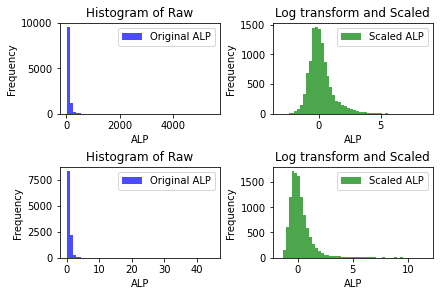

In [27]:
import matplotlib.pyplot as plt
plt.subplots(constrained_layout=True)
plt.subplot(2, 2, 1)
plt.hist(x_train['ALP'], bins=50, alpha=0.7, color='blue', label='Original ALP')
plt.title('Histogram of Raw')
plt.xlabel('ALP')
plt.ylabel('Frequency')
plt.legend()
plt.subplot(2, 2, 2)
plt.hist(scaled_x_train['ALP'], bins=50, alpha=0.7, color='green', label='Scaled ALP')
plt.title('Log transform and Scaled')
plt.xlabel('ALP')
plt.ylabel('Frequency')
plt.legend()
plt.subplot(2, 2, 3)
plt.hist(x_train['Total Bilirubin'], bins=50, alpha=0.7, color='blue', label='Original ALP')
plt.title('Histogram of Raw')
plt.xlabel('ALP')
plt.ylabel('Frequency')
plt.legend()
plt.subplot(2, 2, 4)
plt.hist(scaled_x_train['Total Bilirubin'], bins=50, alpha=0.7, color='green', label='Scaled ALP')
plt.title('Log transform and Scaled')
plt.xlabel('ALP')
plt.ylabel('Frequency')
plt.legend()

In [28]:
scaled_x_train

,검체번호,환자번호,검사일,성별,나이,진료과,입원/외래,ALP,ALT,AST,...,prev_ALT,prev_AST,prev_Albumin,prev_BUN,prev_Creatinine,prev_GGT,prev_Glucose,prev_LDH,prev_Total Bilirubin,prev_Total Protein
0,506HFY625,006A2VZ,2024-09-10 23:37:06,2,19,6,1,0.296590,0.974533,1.043073,...,-0.490475,-0.363353,0.622444,-0.234515,-0.813265,-0.402174,-0.190565,-0.029766,-0.706494,0.389546
1,FJNPE148M,00D2LN5,2024-10-28 23:10:04,2,1,16,1,2.666904,0.390446,0.405608,...,0.258352,0.645625,0.422557,0.699512,-1.795898,-1.140314,-0.486810,1.291598,-1.121650,-0.516037
2,GSLO14AW0,00GAI20,2024-09-25 23:58:50,1,47,17,1,-0.195484,-0.407017,-0.825993,...,3.546516,5.879810,0.000000,0.197374,-0.526365,3.182658,0.779476,2.275357,1.611487,0.000000
3,DLJ2OU5HJ,00GAI20,2024-10-09 23:25:50,1,47,17,1,0.472621,0.258352,-0.208583,...,3.674580,3.578162,0.000000,-0.754888,-0.526365,3.099148,0.103472,1.063958,1.257951,0.099228
4,9Z5TPVNFI,00IXKXQ,2023-10-15 01:41:25,1,65,8,2,0.128902,-0.490475,-0.722853,...,-0.490475,-0.625609,0.622444,-0.351048,-0.255868,0.794173,-0.455772,-0.671929,-0.759082,0.483963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11161,XVBH25YNQ,ZYWX4N9,2024-10-25 00:02:23,1,41,10,2,-0.109382,0.509525,0.299242,...,0.546748,0.353256,1.357430,0.216932,-0.255868,0.614529,-1.035336,-0.308866,1.638285,2.089590
11162,D8PWEANPI,ZZ006ZJ,2023-10-10 22:57:49,1,77,8,2,0.178248,0.838472,0.243457,...,0.390446,0.553640,-0.110820,1.200353,1.298746,0.253696,0.897480,0.171931,1.243038,0.293971
11163,G94WFQNCF,ZZ006ZJ,2024-10-14 23:54:34,1,78,8,2,0.595269,0.652003,0.126080,...,0.838472,0.243457,0.422557,0.520219,0.473635,0.509384,0.759328,-1.136406,-0.430599,0.197208
11164,YTVT6RVNM,ZZMZWI3,2024-09-10 00:32:01,1,35,6,2,-0.478233,-0.255612,-0.208583,...,-0.676945,-0.533625,0.719772,-0.949880,0.000000,0.228756,0.276032,-0.899968,-0.603633,0.099228


In [29]:
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

# DNN upgrade
gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

sel_str = ['ALP', 'ALT', 'AST',
       'Albumin', 'BUN', 'Creatinine', 'GGT', 'Glucose', 'LDH',
       'Total Bilirubin', 'Total Protein','prev_ALP', 'prev_ALT', 'prev_AST',
       'prev_Albumin', 'prev_BUN', 'prev_Creatinine', 'prev_GGT',
       'prev_Glucose', 'prev_LDH', 'prev_Total Bilirubin',
       'prev_Total Protein']

tx = x.copy()
# sc = MinMaxScaler()
# tx[['성별','나이','진료과']]=sc.fit_transform(tx[['성별','나이','진료과']])

train_idx, test_idx = next(gss.split(x, groups=x['환자번호']))
x_train = tx.iloc[train_idx].reset_index(drop=True)
x_val = tx.iloc[test_idx].reset_index(drop=True)

x_train,y_train=shuffle_selected_columns_together_df(x_train, ['ALP', 'ALT', 'AST', 'Albumin',
       'BUN', 'Creatinine', 'GGT', 'Glucose', 'LDH', 'Total Bilirubin',
       'Total Protein'], shuffle_ratio=0.3, random_state=111)

x_val,y_val=shuffle_selected_columns_together_df(x_val, ['ALP', 'ALT', 'AST', 'Albumin',
       'BUN', 'Creatinine', 'GGT', 'Glucose', 'LDH', 'Total Bilirubin',
       'Total Protein'], shuffle_ratio=0.1, random_state=111)

current_columns = ['ALP', 'ALT', 'AST', 'Albumin', 'BUN', 'Creatinine', 'GGT', 'Glucose', 'LDH', 'Total Bilirubin', 'Total Protein']
prev_columns = [f'prev_{col}' for col in current_columns]
scaled_x_train,scalers=apply_transformation(x_train, current_columns, prev_columns)
scaled_x_val,scalers=apply_transformation(x_val, current_columns, prev_columns)

weights = compute_class_weight(class_weight='balanced', classes=np.array([0, 1]), y=y_train)
class_weights = dict(zip(np.array([0, 1]), weights))
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

model = []
tf.keras.backend.clear_session()
model = Sequential([
    Dense(256, activation='relu', input_shape=(x_train[sel_str].shape[1],)),  # 첫 번째 은닉층
    Dropout(0.1),  # 과적합 방지
    Dense(256, activation='relu'),  # 두 번째 은닉층
    Dropout(0.1),  # 과적합 방지
    Dense(128, activation='relu'),  # 세 번째 은닉층
    Dropout(0.1),  # 과적합 방지
    Dense(64, activation='relu'),  # 네 번째 은닉층
    Dropout(0.1),  # 과적합 방지
    Dense(32),  # 네 번째 은닉층
    Dense(1, activation='sigmoid')  # 출력층 (이진 분류)
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
            #   metrics=['binary_accuracy'])
              metrics=[tf.keras.metrics.AUC(name='PR', curve='PR'),tf.keras.metrics.AUC(curve='ROC')])

model.fit(scaled_x_train[sel_str].astype(float), y_train, validation_data=(scaled_x_val[sel_str].astype(float), y_val),
          callbacks=[early_stopping_cb],
          class_weight=class_weights,
          epochs=500, batch_size=256, verbose = 2)
y_pred=(model.predict(scaled_x_val[sel_str].astype(float))>0.5).astype(int)

accuracy = accuracy_score(y_val, y_pred)
sensitivity = recall_score(y_val, y_pred)
tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
specificity = tn / (tn + fp)
f1 = f1_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"Balanced Accuracy: {(sensitivity+specificity)/2:.2f}")
print(f"Sensitivity: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"F1-Score: {f1:.2f}")


Epoch 1/500
44/44 - 1s - loss: 0.5468 - PR: 0.6533 - auc: 0.8082 - val_loss: 0.3835 - val_PR: 0.5033 - val_auc: 0.9017 - 1s/epoch - 28ms/step
Epoch 2/500
44/44 - 0s - loss: 0.3836 - PR: 0.7978 - auc: 0.9133 - val_loss: 0.4042 - val_PR: 0.5470 - val_auc: 0.9227 - 350ms/epoch - 8ms/step
Epoch 3/500
44/44 - 0s - loss: 0.3293 - PR: 0.8229 - auc: 0.9321 - val_loss: 0.3282 - val_PR: 0.5752 - val_auc: 0.9338 - 342ms/epoch - 8ms/step
Epoch 4/500
44/44 - 0s - loss: 0.2988 - PR: 0.8404 - auc: 0.9422 - val_loss: 0.3523 - val_PR: 0.5961 - val_auc: 0.9388 - 341ms/epoch - 8ms/step
Epoch 5/500
44/44 - 0s - loss: 0.2867 - PR: 0.8458 - auc: 0.9454 - val_loss: 0.3113 - val_PR: 0.6005 - val_auc: 0.9431 - 348ms/epoch - 8ms/step
Epoch 6/500
44/44 - 0s - loss: 0.2642 - PR: 0.8563 - auc: 0.9520 - val_loss: 0.3014 - val_PR: 0.6002 - val_auc: 0.9424 - 352ms/epoch - 8ms/step
Epoch 7/500
44/44 - 0s - loss: 0.2599 - PR: 0.8614 - auc: 0.9533 - val_loss: 0.2970 - val_PR: 0.5986 - val_auc: 0.9450 - 363ms/epoch - 8ms

In [30]:
x_test = pd.read_csv('evaluation_set.csv')
# x_test[['성별','나이','진료과']]=sc.transform(x_test[['성별','나이','진료과']])
scaled_x_test,scalers=apply_transformation(x_test, current_columns, prev_columns)
y_pred = (model.predict(scaled_x_test[sel_str].astype(float))>0.5).astype(int)
evaluate_predictions(y_pred)

========EVALUATION RESULTS========
F1 :0.815 BAC : 0.976 PPV (Precision): 0.688
🎉 비극적인 사고를 예방했습니다! 병원은 안전합니다.


# **5. Hyperparameter + Architecture Tuning**

## **5.1. 하이퍼파라미터 튜닝(Hyperparameter Tuning)**

- **하이퍼파라미터 튜닝**은 머신러닝 모델의 **성능을 최적화**하기 위해 모델이 학습하는 과정에서 설정하는 **파라미터들**을 조정하는 과정입니다. 하이퍼파라미터는 모델이 학습할 때 **사용자가 직접 설정해야 하는 값들**로, 적절히 조정하지 않으면 모델 성능이 낮아질 수 있습니다.

- 하이퍼파라미터 예시

| **모델**   | **주요 하이퍼파라미터**                                                                                   | **특징**                                                                                 |
|------------|-----------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------|
| **XGBoost**| `learning_rate`, `max_depth`, `n_estimators`, `subsample`, `colsample_bytree`, `lambda`, `alpha`, `gamma` | 결정 트리 기반. 과적합 방지를 위한 정규화와 샘플링 비율이 중요.                          |
| **DNN**    | `number_of_hidden_layers`, `neurons_per_layer`, `learning_rate`, `dropout_rate`, `activation_function`, `L1/L2 regularization` | 은닉층과 뉴런 수 조정이 중요하며, 정규화를 통해 일반화 성능 향상 가능.                   |


### 튜닝 방법
![gridrandomsearch](https://github.com/dlab-amc/DLab-TG-AI/blob/main/images/gridrandomsearch-1.png?raw=true)
1. **그리드 서치(Grid Search)**:
   - 그리드 서치는 **모든 하이퍼파라미터의 가능한 값들**을 **조합**하여 가장 좋은 성능을 내는 파라미터를 찾는 방법입니다.
   - 예를 들어, `learning_rate` 값을 0.1, 0.01, 0.001로 시도하고, `max_depth` 값을 3, 5, 7로 시도하여 각 조합을 평가하는 방식입니다.
   - 이 방법은 모든 조합을 테스트트하기 때문에, 파라미터가 많을 경우 계산 시간이 매우 오래 걸려 비효율적입니다.

2. **랜덤 서치(Random Search)**:
   - 그리드 서치와 달리, **하이퍼파라미터를 랜덤으로 선택**하여 최적의 값을 찾는 방법입니다. 모든 조합을 시도하지 않기 때문에 속도가 더 빠르지만, **최적의 조합을 놓칠 수** 있습니다.
   
3. **베이지안 최적화(Bayesian Optimization)**:
   - 이전 실험에서 얻은 결과를 바탕으로 다음 실험에 사용할 하이퍼파라미터 값을 결정하는 방식으로, 점진적으로 최적의 하이퍼파라미터를 찾습니다. 탐색 공간의 확률 모델을 생성하여 기대값이 최대화되는 지점을 샘플링하는 원리입니다.
   

### **베이지안 최적화**

베이지안 최적화의 핵심은 **Surrogate Model**과 **Acquisition Function**을 사용하는 것입니다.

**1. Surrogate Model**

Surrogate Model은 목표 함수( $f(x)$ )의 실제 계산을 대신해 확률적인 추정을 제공하는 모델입니다. 이는 실제 목적 함수 $f(x)$ 를 평가하는 데 필요한 비용을 줄이기 위해 사용됩니다.

![alt text](https://github.com/dlab-amc/DLab-TG-AI/blob/main/images/bayesian1-1.png?raw=true)![alt text](https://github.com/dlab-amc/DLab-TG-AI/blob/main/images/bayesian6-1.png?raw=true)

입력값 $(x1, f(x1)), (x2, f(x2)), ... , (xt, f(xt))$ 라는 이미 수집된 데이터를 바탕으로, 실제 목표 함수 $f(x)$ 에 대한 확률적인 추정을 합니다.
즉, 실제로 계산할 수 없는 함수의 형태를 예측하는 역할을 합니다.

예시: 하이퍼파라미터 집합과 그에 대응하는 일반화 성능을 모델링한 결과로 생각할 수 있습니다. 이 모델을 통해 하이퍼파라미터의 변화에 따른 성능 변화를 예측할 수 있습니다.



**2. Acquisition Function**

![alt text](https://github.com/dlab-amc/DLab-TG-AI/blob/main/images/bayesian2-1.png?raw=true)

Acquisition Function은 Surrogate Model의 예측을 바탕으로 다음 탐색할 입력값을 추천하는 함수입니다. 이를 통해 다음 실험을 설계하여 최적값에 가까운 하이퍼파라미터를 찾습니다.

![alt text](https://github.com/dlab-amc/DLab-TG-AI/blob/main/images/bayesian3-1.png?raw=true)

Surrogate Model이 예측한 목표 함수의 추정을 바탕으로, 최적값일 가능성이 높은 값과 불확실성이 큰 값을 구분해 추천합니다.

- 최적값일 가능성이 높은 값: Surrogate Model에서 함수값이 높은 곳.

- 불확실성이 큰 값: Surrogate Model에서 표준편차가 큰 곳.

![alt text](https://github.com/dlab-amc/DLab-TG-AI/blob/main/images/bayesian4-1.png?raw=true)

예시: 다음에 탐색할 하이퍼파라미터 집합을 결정하는 데 사용됩니다. Acquisition Function은 실험을 반복하며 모델의 성능을 개선할 가능성이 높은 하이퍼파라미터를 선택합니다.
    
![alt text](https://github.com/dlab-amc/DLab-TG-AI/blob/main/images/bayesian5-1.png?raw=true)

=> **검은 점선**은 실제 목적 함수, **검은 실선**은 추정한 목적함수(Surrogate Model)를 의미합니다. 파란 영역은 추정된 $σ(x)$, 하단 녹색 실선은 Acquistition Function을 의미합니다.

**Bayesian Optimization의 작동 원리**

1. 초기 하이퍼파라미터 집합과 성능 수집:
    - 초기 하이퍼파라미터 집합에 대해 목표 함수의 성능을 평가하고, 이를 Surrogate Model에 입력하여 모델링합니다.
2. Acquisition Function을 통해 새로운 후보 찾기:
    - Surrogate Model을 통해 예측된 정보를 바탕으로 Acquisition Function을 사용하여 다음 탐색할 하이퍼파라미터를 추천합니다.
3. 다음 실험 수행:
    - 추천된 하이퍼파라미터 집합을 사용하여 실제로 모델을 학습하고 성능을 측정합니다. 이 결과는 새로운 데이터로 추가됩니다.
4. 모델 업데이트:
    - 새로 수집된 하이퍼파라미터 집합과 성능 정보를 Surrogate Model에 업데이트하여, 더 정교한 예측을 할 수 있도록 합니다.
5. 반복:
    - 이 과정을 반복하면서 점점 더 최적의 하이퍼파라미터 집합을 찾아냅니다.



### Optuna란?

**Optuna**는 **하이퍼파라미터 튜닝을 자동화**하는 라이브러리로, **효율적이고 빠른 방법**으로 최적의 하이퍼파라미터를 찾을 수 있게 도와줍니다. Optuna는 베이지안 최적화를 기반으로 하여 **최소화/최대화하려는 목표 함수**를 효율적으로 탐색합니다. 주로 머신러닝 모델을 학습할 때 하이퍼파라미터를 최적화하는 데 사용됩니다.

### Optuna 사용 방법:

1. **목표 함수 정의**:
   - Optuna는 **목표 함수(objective function)** 를 최적화합니다. 이 함수는 하이퍼파라미터를 입력받아, 모델의 성능을 평가한 후 그 결과를 반환합니다.
   
2. **검색 공간 설정**:
   - 튜닝할 하이퍼파라미터와 그 값들의 범위를 설정합니다.

3. **Optuna 최적화 실행**:
   - Optuna가 여러 번의 실험을 실행하면서 각 하이퍼파라미터 조합에 대한 성능을 평가하고, 최적의 값을 찾아냅니다.

### 코드 예제 (Tuning Pipeline)

1. objective Function안에 모델 학습과정을 Wraping하고 Metric을 반환합니다.
2. trial object를 이용해 HyperParmater를 Suggest합니다.(Sampling)
3. study object를 만들고 Optimization을 실행합니다.


```python
    import optuna

    def objective(trial):
        x = trial.suggest_float('x', -10, 10)
        return (x - 2) ** 2

    study = optuna.create_study()
    study.optimize(objective, n_trials=100)
    study.best_params  # E.g. {'x': 2.002108042}
```

<br>
-10~ 10 사이의 Float를 파라미터($x$) 범위로 정의하고, $(x-2)**2$ 이 최소가 될 수 있도록 최적화하는 함수의 예시입니다.

파라미터의 범위는 objective 함수 안에서 입력된 trial method를 이용해 지정할 수 있습니다. 파라미터의 특성에 맞게 suggest method를 고르면 됩니다.

- 대표적인 suggest method
    - suggest_categorical(name, choices)
    - suggest_float(name, low, high, *, step=None, log=False)
    - suggest_int(name, low, high, step=1, log=False)

In [34]:
!pip install --user optuna

  Using cached optuna-4.1.0-py3-none-any.whl.metadata (16 kB)
  Using cached alembic-1.14.0-py3-none-any.whl.metadata (7.4 kB)
  Using cached colorlog-6.9.0-py3-none-any.whl.metadata (10 kB)
  Using cached SQLAlchemy-2.0.36-cp39-cp39-win_amd64.whl.metadata (9.9 kB)
  Using cached Mako-1.3.7-py3-none-any.whl.metadata (2.9 kB)
  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
  Using cached greenlet-3.1.1-cp39-cp39-win_amd64.whl.metadata (3.9 kB)
Using cached optuna-4.1.0-py3-none-any.whl (364 kB)
Using cached alembic-1.14.0-py3-none-any.whl (233 kB)
Using cached SQLAlchemy-2.0.36-cp39-cp39-win_amd64.whl (2.1 MB)
Using cached colorlog-6.9.0-py3-none-any.whl (11 kB)
Using cached greenlet-3.1.1-cp39-cp39-win_amd64.whl (298 kB)
Using cached typing_extensions-4.12.2-py3-none-any.whl (37 kB)
Using cached Mako-1.3.7-py3-none-any.whl (78 kB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


## **5.2. XGB HP tuning**

In [45]:
def hp_xgb(trial, y_train):
    class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
    param = {
        'scale_pos_weight': class_weights[1]/class_weights[0],
        'objective': 'binary:logistic',  # 이진 분류 (0 또는 1로 분류)
        'booster': trial.suggest_categorical('booster', ['gbtree', 'dart']),  # 부스팅 방법 선택 ('gbtree' 또는 'dart')
        'lambda': trial.suggest_float('lambda', 1e-8, 1.0, log=True),  # L2 정규화 계수 (모델의 과적합을 방지)
        'alpha': trial.suggest_float('alpha', 1e-8, 1.0, log=True),  # L1 정규화 계수 (모델의 과적합을 방지)
        'learning_rate': trial.suggest_categorical('lr', [0.01, 0.005, 0.001,0.0001]),  # 학습률 (모델을 학습할 때 얼마나 빨리 업데이트할지 결정)
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),  # 데이터 샘플링 비율 (모델이 학습에 사용할 데이터의 비율)
        'max_depth': trial.suggest_int('max_depth', 2, 30),  # 트리의 최대 깊이 (트리 모델의 복잡도를 결정)
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 40),  # 리프 노드에 최소한 있어야 할 샘플의 수
        'n_estimators': trial.suggest_int('n_estimators', 10, 1000, step=10),  # 트리의 개수
        'tree_method': 'gpu_hist',  # GPU를 이용한 트리 학습 방법
        'predictor': 'gpu_predictor',  # GPU에서 예측을 빠르게 하기 위한 설정
        # 'gpu_id': -1,  # 사용할 GPU를 지정 (여기서는 -1로 설정하여 GPU를 사용하지 않음)
        'eval_metric': 'aucpr',
        'early_stopping_rounds' : 50,
    }
    model = xgb.XGBClassifier(**param) # 위에서 설정한 하이퍼파라미터를 바탕으로 XGBoost 모델을 생성
    return model

def hp_dnn(trial, input_dim):
    num_layers = trial.suggest_int('num_layers', 2, 10)  # DNN의 은닉층 개수를 2~10 사이에서 탐색
    activ_fcn = trial.suggest_categorical('dense_activation', ['relu', 'elu', 'gelu']) # 은닉층에서 사용할 활성화 함수를 'relu', 'elu', 'gelu' 중 선택
    optimizer_name = trial.suggest_categorical('optimizer', ['Adam','Nadam']) # 최적화 알고리즘을 'Adam' 또는 'Nadam' 중에서 선택
    lr = trial.suggest_categorical('lr', [0.001, 0.005, 0.0005]) # 학습률(learning rate)을 세 가지 고정값 중에서 선택
    input_tensor = tf.keras.layers.Input(shape=(input_dim,)) # 입력 텐서 정의. 입력 데이터는 1D 벡터로 처리됨
    x = input_tensor
    for i in range(num_layers):
        units = trial.suggest_int(name='units_' + str(i), low=16, high=512, step=16)  # 각 은닉층의 뉴런 수를 16에서 512까지 16 단위로 탐색
        # 은닉층(Dense Layer)을 추가. 샘플링된 뉴런 수, 활성화 함수, 가중치 초기화 방식 사용
        # 가중치 초기화 방식: 'he_normal', 'glorot_uniform', 'lecun_normal' 중 선택
        x = tf.keras.layers.Dense(units=units, activation=activ_fcn,
                                  kernel_initializer=trial.suggest_categorical('kernel_initializer_' + str(i), ['he_normal', 'glorot_uniform', 'lecun_normal']))(x)
        batch_norm = trial.suggest_categorical('batch_' + str(i), [True, False]) # 배치 정규화(Batch Normalization) 적용 여부를 True/False로 결정
        if batch_norm:
            x = tf.keras.layers.BatchNormalization()(x) # 배치 정규화를 추가해 학습 안정성을 높임
        dropout = trial.suggest_categorical('dropout_' + str(i), [True, False]) # 드롭아웃 적용 여부를 True/False로 결정
        if dropout:
            dropout_rate = trial.suggest_float('dropout_rate_' + str(i), 0.1, 0.5, step=0.1)  # 드롭아웃 비율을 0.1~0.5 사이에서 0.1 단위로 탐색
            x = tf.keras.layers.Dropout(dropout_rate)(x) # 드롭아웃 레이어 추가
        l2_reg = trial.suggest_float('l2_reg_' + str(i), 1e-6, 1e-1, log=True) # L2 정규화 강도를 로그 스케일로 1e-6에서 1e-1 사이에서 탐색
        x = tf.keras.layers.Dense(units=units, activation=activ_fcn,
                                  kernel_regularizer=tf.keras.regularizers.l2(l2_reg))(x) # 은닉층(Dense Layer)에 L2 정규화를 적용
    x = tf.keras.layers.Dense(1, activation='sigmoid')(x)  # 출력층. 이진 분류를 위한 시그모이드 활성화 함수 사용
    model = tf.keras.Model(inputs=input_tensor, outputs=x) # 입력 텐서와 출력 텐서를 연결해 모델 정의
    if optimizer_name == 'Adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    elif optimizer_name == 'Nadam':
        optimizer = tf.keras.optimizers.Nadam(learning_rate=lr)
    # else:  # RMSprop
    #     optimizer = RMSprop(learning_rate=lr)
    model.compile(loss='binary_crossentropy', # 손실 함수: 이진 교차 엔트로피(binary_crossentropy)
                  optimizer=optimizer,
                  metrics=[tf.keras.metrics.AUC(name='PR', curve='PR'),
                           tf.keras.metrics.BinaryAccuracy(name='bacc', threshold=0.5),
                           tf.keras.metrics.AUC(curve='ROC')])
    return model

In [39]:
import optuna
#!pip install optuna

sel_str = ['성별','나이','진료과','입원/외래','ALP', 'ALT', 'AST',
       'Albumin', 'BUN', 'Creatinine', 'GGT', 'Glucose', 'LDH',
       'Total Bilirubin', 'Total Protein','prev_ALP', 'prev_ALT', 'prev_AST',
       'prev_Albumin', 'prev_BUN', 'prev_Creatinine', 'prev_GGT',
       'prev_Glucose', 'prev_LDH', 'prev_Total Bilirubin',
       'prev_Total Protein']

# insilico simulation
gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

train_idx, test_idx = next(gss.split(x, groups=x['환자번호']))
x_train = x.iloc[train_idx].reset_index(drop=True)
x_val = x.iloc[test_idx].reset_index(drop=True)

x_train,y_train=shuffle_selected_columns_together_df(x_train, ['ALP', 'ALT', 'AST', 'Albumin',
       'BUN', 'Creatinine', 'GGT', 'Glucose', 'LDH', 'Total Bilirubin',
       'Total Protein'], shuffle_ratio=0.2, random_state=111)

x_val,y_val=shuffle_selected_columns_together_df(x_val, ['ALP', 'ALT', 'AST', 'Albumin',
       'BUN', 'Creatinine', 'GGT', 'Glucose', 'LDH', 'Total Bilirubin',
       'Total Protein'], shuffle_ratio=0.1, random_state=111)

# HP tuning ----------------------
def objective(trial):
    model = []
    model = hp_xgb(trial,y_train)
    model.fit(x_train[sel_str], y_train,    
          eval_set = [(x_train[sel_str],y_train), (x_val[sel_str],y_val)])
    preds = (model.predict_proba(x_val[sel_str])[:, 1] > 0.5).astype(int)    # print('AUROC : ', roc_auc_score(y_val, preds[:,1]))
    return f1_score(y_val, preds)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials = 3, show_progress_bar=True)

[I 2024-12-04 12:00:03,169] A new study created in memory with name: no-name-ef9360f2-ca13-4775-ba84-ec2967677be3


  0%|          | 0/3 [00:00<?, ?it/s]

[0]	validation_0-aucpr:0.59135	validation_1-aucpr:0.27832
[1]	validation_0-aucpr:0.65442	validation_1-aucpr:0.34782
[2]	validation_0-aucpr:0.68114	validation_1-aucpr:0.37921
[3]	validation_0-aucpr:0.74007	validation_1-aucpr:0.40515
[4]	validation_0-aucpr:0.75271	validation_1-aucpr:0.41362
[5]	validation_0-aucpr:0.76434	validation_1-aucpr:0.42071
[6]	validation_0-aucpr:0.79708	validation_1-aucpr:0.44649
[7]	validation_0-aucpr:0.81384	validation_1-aucpr:0.46749
[8]	validation_0-aucpr:0.82905	validation_1-aucpr:0.48411
[9]	validation_0-aucpr:0.82899	validation_1-aucpr:0.47759
[10]	validation_0-aucpr:0.82843	validation_1-aucpr:0.47087
[11]	validation_0-aucpr:0.82799	validation_1-aucpr:0.47079
[12]	validation_0-aucpr:0.83865	validation_1-aucpr:0.48696
[13]	validation_0-aucpr:0.83872	validation_1-aucpr:0.48593
[14]	validation_0-aucpr:0.83536	validation_1-aucpr:0.48434
[15]	validation_0-aucpr:0.84249	validation_1-aucpr:0.48885
[16]	validation_0-aucpr:0.85185	validation_1-aucpr:0.49788
[17]	va

XGBoostError: [12:00:27] c:\users\administrator\workspace\xgboost-win64_release_1.6.0\src\data\../common/device_helpers.cuh:428: Memory allocation error on worker 0: Caching allocator
- Free memory: 307388416
- Requested memory: 8589934576


In [ ]:
# model training ----------------------
best_trial=study.best_trial
best_model=hp_xgb(best_trial,y_train)
best_model.fit(x_train[sel_str], y_train,
                 eval_set=[(x_train[sel_str], y_train), (x_val[sel_str], y_val)])

In [ ]:
# XGB testing
y_pred  = best_model.predict(x_val[sel_str])
y_pred_probs = best_model.predict_proba(x_val[sel_str])[:,1]
# 민감도(Recall) 계산
sensitivity = recall_score(y_val, y_pred)
# 특이도 계산
tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
specificity = tn / (tn + fp)

# F1-score 계산
f1 = f1_score(y_val, y_pred)

print(f"Balanced Accuracy: {(sensitivity+specificity)/2:.3f}")
print(f"Sensitivity: {sensitivity:.3f}")
print(f"Specificity: {specificity:.3f}")
print(f"F1-Score: {f1:.3f}")

## **5.3. DNN HP tuning**

In [51]:
import optuna
#!pip install optuna

sel_str = ['ALP', 'ALT', 'AST',
       'Albumin', 'BUN', 'Creatinine', 'GGT', 'Glucose', 'LDH',
       'Total Bilirubin', 'Total Protein','prev_ALP', 'prev_ALT', 'prev_AST',
       'prev_Albumin', 'prev_BUN', 'prev_Creatinine', 'prev_GGT',
       'prev_Glucose', 'prev_LDH', 'prev_Total Bilirubin',
       'prev_Total Protein']

tx = x.copy()
# sc = MinMaxScaler()
# tx[['성별','나이','진료과']]=sc.fit_transform(tx[['성별','나이','진료과']])

train_idx, test_idx = next(gss.split(x, groups=x['환자번호']))
x_train = tx.iloc[train_idx].reset_index(drop=True)
x_val = tx.iloc[test_idx].reset_index(drop=True)

x_train,y_train=shuffle_selected_columns_together_df(x_train, ['ALP', 'ALT', 'AST', 'Albumin',
       'BUN', 'Creatinine', 'GGT', 'Glucose', 'LDH', 'Total Bilirubin',
       'Total Protein'], shuffle_ratio=0.3, random_state=111)

x_val,y_val=shuffle_selected_columns_together_df(x_val, ['ALP', 'ALT', 'AST', 'Albumin',
       'BUN', 'Creatinine', 'GGT', 'Glucose', 'LDH', 'Total Bilirubin',
       'Total Protein'], shuffle_ratio=0.1, random_state=111)

current_columns = ['ALP', 'ALT', 'AST', 'Albumin', 'BUN', 'Creatinine', 'GGT', 'Glucose', 'LDH', 'Total Bilirubin', 'Total Protein']
prev_columns = [f'prev_{col}' for col in current_columns]
scaled_x_train,scalers=apply_transformation(x_train, current_columns, prev_columns)
scaled_x_val,scalers=apply_transformation(x_val, current_columns, prev_columns)

weights = compute_class_weight(class_weight='balanced', classes=np.array([0, 1]), y=y_train)
class_weights = dict(zip(np.array([0, 1]), weights))
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)


# HP tuning ----------------------
def objective(trial):
    model = []
    tf.keras.backend.clear_session()
    model = hp_dnn(trial,x_train[sel_str].shape[1])
    model.fit(scaled_x_train[sel_str].astype(float), y_train, validation_data=(scaled_x_val[sel_str].astype(float), y_val),
          callbacks=[early_stopping_cb],
          class_weight=class_weights,
          epochs=100, batch_size=256, verbose = 2)
    y_pred=(model.predict(scaled_x_val[sel_str].astype(float))>0.5).astype(int)    
    return f1_score(y_val, y_pred)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials = 3, show_progress_bar=True)



[I 2024-12-04 12:05:36,332] A new study created in memory with name: no-name-ac7aa37e-7fc3-487d-b82a-1da1bc306cfe


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 1/100
44/44 - 2s - loss: 1.1106 - PR: 0.4823 - bacc: 0.6165 - auc: 0.6695 - val_loss: 0.9914 - val_PR: 0.3662 - val_bacc: 0.7441 - val_auc: 0.8132 - 2s/epoch - 39ms/step
Epoch 2/100
44/44 - 1s - loss: 0.8902 - PR: 0.6870 - bacc: 0.7601 - auc: 0.8187 - val_loss: 0.7985 - val_PR: 0.4820 - val_bacc: 0.8414 - val_auc: 0.8744 - 542ms/epoch - 12ms/step
Epoch 3/100
44/44 - 1s - loss: 0.7656 - PR: 0.7467 - bacc: 0.8140 - auc: 0.8659 - val_loss: 0.7409 - val_PR: 0.5136 - val_bacc: 0.8411 - val_auc: 0.8899 - 528ms/epoch - 12ms/step
Epoch 4/100
44/44 - 1s - loss: 0.6824 - PR: 0.7696 - bacc: 0.8320 - auc: 0.8869 - val_loss: 0.6780 - val_PR: 0.5264 - val_bacc: 0.8535 - val_auc: 0.9044 - 525ms/epoch - 12ms/step
Epoch 5/100
44/44 - 1s - loss: 0.6256 - PR: 0.7807 - bacc: 0.8418 - auc: 0.8969 - val_loss: 0.6079 - val_PR: 0.5423 - val_bacc: 0.8696 - val_auc: 0.9093 - 520ms/epoch - 12ms/step
Epoch 6/100
44/44 - 1s - loss: 0.5802 - PR: 0.7890 - bacc: 0.8469 - auc: 0.9038 - val_loss: 0.5597 - val_PR:

In [52]:
# model training ----------------------
best_trial=study.best_trial
best_model=hp_dnn(best_trial,x_train[sel_str].shape[1])
best_model.fit(scaled_x_train[sel_str].astype(float), y_train, validation_data=(scaled_x_val[sel_str].astype(float), y_val),
          callbacks=[early_stopping_cb],
          class_weight=class_weights,
          epochs=100, batch_size=256, verbose = 2)

Epoch 1/100
44/44 - 3s - loss: 0.6637 - PR: 0.7212 - bacc: 0.7801 - auc_1: 0.8619 - val_loss: 0.6837 - val_PR: 0.5154 - val_bacc: 0.8421 - val_auc_1: 0.8941 - 3s/epoch - 58ms/step
Epoch 2/100
44/44 - 1s - loss: 0.4688 - PR: 0.8125 - bacc: 0.8544 - auc_1: 0.9283 - val_loss: 0.3832 - val_PR: 0.5503 - val_bacc: 0.9063 - val_auc_1: 0.9149 - 832ms/epoch - 19ms/step
Epoch 3/100
44/44 - 1s - loss: 0.4017 - PR: 0.8356 - bacc: 0.8692 - auc_1: 0.9377 - val_loss: 0.3501 - val_PR: 0.5787 - val_bacc: 0.9031 - val_auc_1: 0.9262 - 819ms/epoch - 19ms/step
Epoch 4/100
44/44 - 1s - loss: 0.3585 - PR: 0.8496 - bacc: 0.8806 - auc_1: 0.9461 - val_loss: 0.3376 - val_PR: 0.5529 - val_bacc: 0.8974 - val_auc_1: 0.9293 - 845ms/epoch - 19ms/step
Epoch 5/100
44/44 - 1s - loss: 0.3355 - PR: 0.8521 - bacc: 0.8847 - auc_1: 0.9486 - val_loss: 0.2830 - val_PR: 0.6043 - val_bacc: 0.9016 - val_auc_1: 0.9326 - 832ms/epoch - 19ms/step
Epoch 6/100
44/44 - 1s - loss: 0.3136 - PR: 0.8674 - bacc: 0.8898 - auc_1: 0.9533 - val_

In [ ]:
# XGB testing
y_pred=(model.predict(scaled_x_val[sel_str].astype(float))>0.5).astype(int)    

sensitivity = recall_score(y_val, y_pred)
# 특이도 계산
tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
specificity = tn / (tn + fp)

# F1-score 계산
f1 = f1_score(y_val, y_pred)

print(f"Balanced Accuracy: {(sensitivity+specificity)/2:.3f}")
print(f"Sensitivity: {sensitivity:.3f}")
print(f"Specificity: {specificity:.3f}")
print(f"F1-Score: {f1:.3f}")

y_pred=(model.predict(scaled_x_test[sel_str].astype(float))>0.5).astype(int)    
evaluate_predictions(y_pred)


Balanced Accuracy: 0.883
Sensitivity: 0.864
Specificity: 0.903
F1-Score: 0.630
========EVALUATION RESULTS========
F1 :0.815 BAC : 0.976 PPV (Precision): 0.688
🎉 비극적인 사고를 예방했습니다! 병원은 안전합니다.
